**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Set global variables**

In [2]:
txt_fdiry = file.path(FD_RES, "region_coverage_fcc")
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

atac_ENCFF333TAT 
atac_ENCFF558BLC 
atac_ENCFF925CYR 
atac_ENCFF948AFM 
dnase_ENCFF185XRG 
dnase_ENCFF274YGF 
fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


In [3]:
txt_region = "fcc_astarr_macs_input_union"
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc", txt_region)
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

CRISPRi_FlowFISH_K562_Riley_JinWoo 
CRISPRi_Growth_K562_Gersbach_JinWoo 
MPRA_Lenti_K562_Nadav_Vikram 
MPRA_Tiling_K562_Tewhey_Hannah 
STARR_ATAC_K562_Reddy_KS274 
STARR_ATAC_K562_Reddy_KS91 
STARR_ATAC_K562_Reddy_KSMerge 
STARR_WHG_K562_Reddy_A001 
summary 


In [4]:
#txt_fdiry = file.path(FD_RES, "region_coverage_fcc")
#vec = dir(txt_fdiry)
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_REGION = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


## Import data

In [5]:
### init
txt_assay  = "STARR_ATAC_K562_Reddy_KS91"

###
lst = lapply(VEC_TXT_REGION, function(txt_region){
    ### set file directory
    txt_fdiry = file.path(
        FD_RES, "region_coverage_fcc", 
        txt_region, 
        txt_assay, 
        "overlap_score",
        "summary"
    )
    txt_fname = "matrix.count.TPM.WGS.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 150041     14

$fcc_astarr_macs_input_union
[1] 246852     14



Chrom,ChromStart,ChromEnd,Region,Input.rep1,Input.rep2,Input.rep3,Input.rep4,Input.rep5,Input.rep6,Output.rep1,Output.rep2,Output.rep3,Output.rep4
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,10038,10405,chr1:10038-10405,3.445338,3.888148,4.290341,4.273202,3.397390,4.345809,0.8436118,1.171350,0.3693823,0.4884531
chr1,14282,14614,chr1:14282-14614,2.784182,2.886126,2.973866,2.825963,2.595126,2.984980,1.4920749,2.481768,2.6541010,2.2137812
chr1,16025,16338,chr1:16025-16338,3.454675,4.162517,3.607961,3.719535,3.983521,4.056664,1.5826481,0.801171,1.6241611,1.0309013


## Explore

In [6]:
txt = "fcc_astarr_macs_input_union"
lst = lst_dat_region_score_import
dat = lst[[txt]]
dat_region_score_import = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 246852     14


Chrom,ChromStart,ChromEnd,Region,Input.rep1,Input.rep2,Input.rep3,Input.rep4,Input.rep5,Input.rep6,Output.rep1,Output.rep2,Output.rep3,Output.rep4
chr1,10015,10442,chr1:10015-10442,2.850503,3.086230,3.458733,3.378108,2.712322,3.477542,0.9565227,0.9388693,0.2964292,0.4368262
chr1,14253,14645,chr1:14253-14645,2.203557,2.262136,2.345555,2.198480,2.076131,2.301144,1.1907732,2.2158434,2.4217210,2.4656570
chr1,16015,16477,chr1:16015-16477,2.396596,2.772450,2.562341,2.513628,2.737201,2.733480,1.1366471,0.6508071,1.2328762,0.8441696


In [7]:
library("GGally")

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



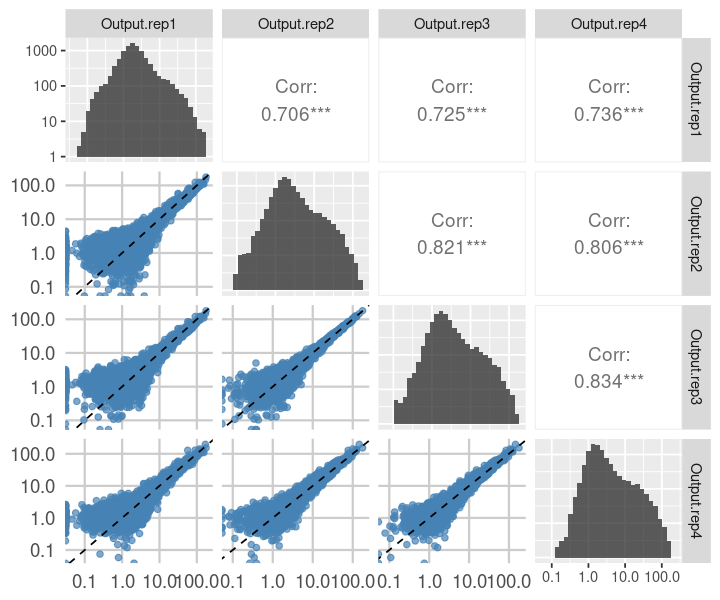

In [22]:
num = 10000
dat = dat_region_score_import
dat = dat %>% 
    dplyr::select(Region, starts_with("Output")) %>%
    tibble::column_to_rownames("Region") %>%
    dplyr::slice_sample(n = num)

my_lower_panel <- function(data, mapping, ...) {
    gpt = ggplot(data = data, mapping = mapping) +
        geom_point(size = 1.5, alpha = 0.7, colour = "steelblue") +          # custom point size & colour
        #geom_smooth(method = "lm", se = FALSE, colour = "darkred") +        # linear fit
        geom_abline(intercept = 0, slope = 1, linetype = "dashed") +        # y = x reference line
        theme_minimal(base_size = 14) +                                     # a clean theme
        theme(
            panel.grid.major = element_line(colour = "grey80"),
            panel.grid.minor = element_blank()
        )
    return(gpt)
}


gpt = ggpairs(
    dat,
    diag = list(
        continuous = wrap(
            "barDiag",
            bins  = 30,       # change number of bins if you like
            fill  = "grey10", # histogram fill color
            #colour= "white", # border color
            alpha = 0.7,
            na.rm = TRUE
        )
    ),
    upper = list(continuous = wrap("cor", method = "spearman", size = 4)),
    lower = list(continuous = my_lower_panel)
)

gpt = suppressMessages(suppressWarnings(gpt + scale_x_log10()))
gpt = suppressMessages(suppressWarnings(gpt + scale_y_log10()))
#gpt = gpt + theme_cowplot() + background_grid()

options(repr.plot.height=5, repr.plot.width=6)
suppressMessages(suppressWarnings(print(gpt)))

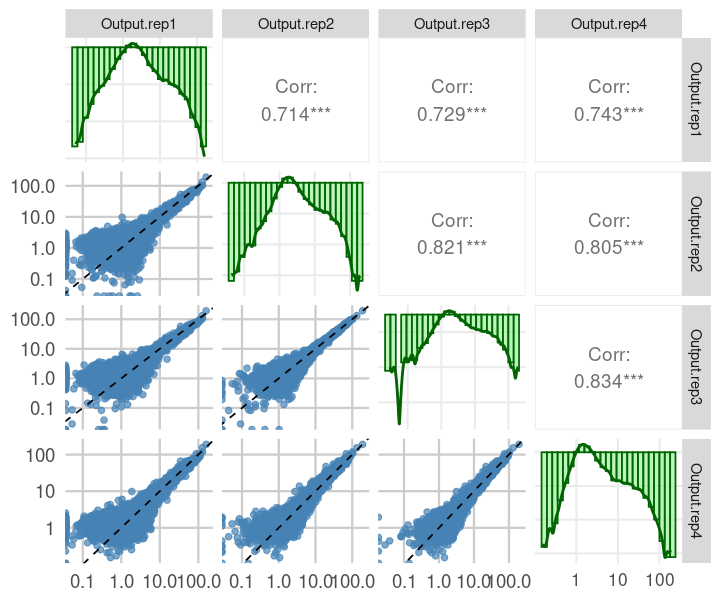

In [23]:
num = 10000
dat = dat_region_score_import
dat = dat %>% 
    dplyr::select(Region, starts_with("Output")) %>%
    tibble::column_to_rownames("Region") %>%
    dplyr::slice_sample(n = num)


my_diag_panel <- function(data, mapping, bins = 25, fill = "lightgreen", colour = "darkgreen", ...) {
  # Extract the variable to plot
  var <- rlang::eval_tidy(mapping$x, data)
  
  ggplot(data = data, mapping = mapping) +
    geom_histogram(
      aes(y = ..density..),    # density scale on y
      bins   = bins,
      fill   = fill,
      colour = colour,
      alpha  = 0.6,
      na.rm  = TRUE
    ) +
    geom_density(
      colour = "darkgreen",
      size   = 0.8,
      adjust = 1,
      na.rm  = TRUE
    ) +
    theme_minimal(base_size = 13) +
    theme(
      axis.title.y    = element_blank(),
      axis.text.y     = element_blank(),
      axis.ticks.y    = element_blank(),
      panel.grid.minor = element_blank()
    ) +
    labs(x = rlang::as_name(mapping$x))
}


my_lower_panel <- function(data, mapping, ...) {
    gpt = ggplot(data = data, mapping = mapping) +
        geom_point(size = 1.5, alpha = 0.7, colour = "steelblue") +          # custom point size & colour
        #geom_smooth(method = "lm", se = FALSE, colour = "darkred") +        # linear fit
        geom_abline(intercept = 0, slope = 1, linetype = "dashed") +        # y = x reference line
        theme_minimal(base_size = 14) +                                     # a clean theme
        theme(
            panel.grid.major = element_line(colour = "grey80"),
            panel.grid.minor = element_blank()
        )
    return(gpt)
}


gpt = ggpairs(
    dat,
    diag  = list(continuous = my_diag_panel),
    upper = list(continuous = wrap("cor", method = "spearman", size = 4)),
    lower = list(continuous = my_lower_panel)
)

gpt = suppressMessages(suppressWarnings(gpt + scale_x_log10()))
gpt = suppressMessages(suppressWarnings(gpt + scale_y_log10()))
#gpt = gpt + theme_cowplot() + background_grid()

options(repr.plot.height=5, repr.plot.width=6)
suppressMessages(suppressWarnings(print(gpt)))